Populating the interactive namespace from numpy and matplotlib


C:\Users\astro\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


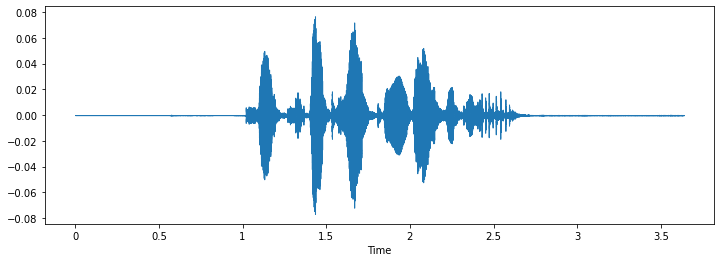

In [1]:
import numpy as np
import joblib
import librosa
from librosa import display
data, sampling_rate = librosa.load('Ravtess/03-01-01-01-01-01-02.wav')
%pylab inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

In [2]:
import time
import os
path = 'Ravtess'
lst = []
start_time = time.time()
for subdir, dirs, files in os.walk(path):
    for file in files:
        try:
            X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
            file = int(file[7:8]) - 1 
            arr = mfccs, file
            lst.append(arr)
        except ValueError:
            continue
print("Time Taken to Load Data: %s seconds ---" % (time.time() - start_time))

Time Taken to Load Data: 45.370214223861694 seconds ---


In [4]:
X, y = zip(*lst)
X = np.asarray(X)
y = np.asarray(y)
X.shape, y.shape
X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = 'Ravtess_model'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.17      0.13      0.15        23
           1       0.52      0.38      0.44        45
           2       0.26      0.30      0.28        50
           3       0.31      0.24      0.27        51
           4       0.38      0.57      0.46        46
           5       0.46      0.51      0.48        51
           6       0.44      0.36      0.40        53
           7       0.30      0.32      0.31        41

    accuracy                           0.36       360
   macro avg       0.35      0.35      0.35       360
weighted avg       0.37      0.36      0.36       360



In [13]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [14]:
x_traincnn.shape, x_testcnn.shape

((1079, 40, 1), (360, 40, 1))

In [8]:
# The Neural Network 
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)

import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

In [27]:
model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.000005,epsilon=1e-09,decay=0.0)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [28]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=300, validation_data=(x_testcnn, y_test))

Epoch 1/300
34/34 [==============================] - 1s 9ms/step - loss: 11.2652 - accuracy: 0.1112 - val_loss: 4.4365 - val_accuracy: 0.0917
Epoch 2/300
34/34 [==============================] - 0s 5ms/step - loss: 9.6350 - accuracy: 0.1010 - val_loss: 3.3047 - val_accuracy: 0.1250
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 8.2421 - accuracy: 0.1335 - val_loss: 2.6828 - val_accuracy: 0.1250
Epoch 4/300
34/34 [==============================] - 0s 6ms/step - loss: 7.9118 - accuracy: 0.1316 - val_loss: 2.5097 - val_accuracy: 0.1250
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 7.7610 - accuracy: 0.1446 - val_loss: 2.4099 - val_accuracy: 0.1250
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 7.8254 - accuracy: 0.1223 - val_loss: 2.4767 - val_accuracy: 0.1278
Epoch 7/300
34/34 [==============================] - 0s 5ms/step - loss: 7.5609 - accuracy: 0.1474 - val_loss: 2.4513 - val_accuracy: 0.1194
Epoch 8/300


In [29]:
predictions = np.argmax(model.predict(x_testcnn),axis=1)
new_Ytest = y_test.astype(int)

In [30]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)

C:\Users\astro\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\astro\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\astro\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
model.save('testing_model(ADAM).h5')
new_model=keras.models.load_model('testing_model(ADAM).h5')

loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Accuracy: {:.2f}%".format(acc*100))
x_testcnn = np.expand_dims(X_test, axis=2)

12/12 [==============================] - 0s 2ms/step - loss: 1.9645 - accuracy: 0.2472
Accuracy: 24.72%
